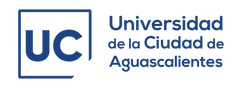

# **METODOS NUMERICOS II**

## Mitsiu Alejandro Carreño Sarabia - E23S-18014

## Accesando a la base de datos

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("s12_titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# <font color=green>TECNICAS DE MUESTREO</font>
***

## <font color=green>Muestreo aleatorio simple</font>
***

Sacar una muestra del 15% de total de los datos.

In [2]:
df.shape

(891, 12)

In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.00000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,32.81725,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,17.32701,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.42000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.00000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,30.00000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,43.00000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.00000,8.000000,6.000000,512.329200


In [4]:
quince_p = int(df.shape[0]*.15)
muestra_simple = df.sample(n=quince_p)

Revisar la variable de Age asi como la de Survived de la muestra, para comparar con el data frame original y checar si las estadisticas son equitativas con los datos originales.

In [5]:
df.Age.describe()

count    891.00000
mean      32.81725
std       17.32701
min        0.42000
25%       21.00000
50%       30.00000
75%       43.00000
max       80.00000
Name: Age, dtype: float64

In [6]:
muestra_simple.Age.describe()

count    133.00000
mean      31.25812
std       17.17570
min        0.83000
25%       19.00000
50%       28.00000
75%       41.00000
max       80.00000
Name: Age, dtype: float64

In [7]:
df.Survived.value_counts(normalize = True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [8]:
muestra_simple.Survived.value_counts(normalize = True)

0    0.631579
1    0.368421
Name: Survived, dtype: float64

## <font color=green>Teorema del límite central</font>
***

> El **Teorema del límite central** establece que, a medida que aumenta el tamaño de la muestra, la distribución de las medias muestrales se aproxima a una distribución normal con una media igual a la media de la población y una desviación estándar igual a la desviación estándar de la variable original dividida por la raíz cuadrada del tamaño de la muestra. Este hecho es válido para $n$ mayor o igual a 30.

# $$\sigma_\bar{x} = \frac{\sigma}{\sqrt{n}}$$

La desviación estándar de las medias muestrales se conoce como **error estándar de la media**

### Comprobando el teorema del límite central
Sacar 2000 muestras
n = 15% de los datos originales

In [9]:
n = 15
total_muestras = 2000

In [10]:
muestras = pd.DataFrame()
muestras

""


## Comprobar por cada parrafo, el texto marcado **en negritas**

> El teorema del límite central establece que **a medida que aumenta el tamaño de la muestra, la distribución de las medias de la muestra se aproxima a una distribución normal** con una media igual a la media de la población y una desviación estándar igual a la desviación estándar de la variable original dividida por la raíz cuadrada del tamaño de la muestra. Este hecho es válido para n mayor o igual a 30.

In [11]:
for i in range(total_muestras):
    _ = df.Age.sample(n)
    _.index = range(0, len(_))
    muestras["Muestra_" + str(i)] = _

/tmp/ipykernel_7122/1864947545.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras["Muestra_" + str(i)] = _
/tmp/ipykernel_7122/1864947545.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras["Muestra_" + str(i)] = _
/tmp/ipykernel_7122/1864947545.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = 

<AxesSubplot: >

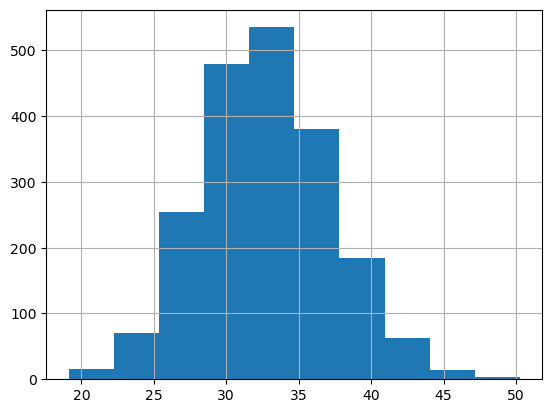

In [12]:
muestras.mean().hist()

> El teorema del límite central establece que, al aumentar el tamaño de la muestra, la distribución de las medias muestrales se aproxima a una distribución normal **con una media igual a la media poblacional** y una desviación estándar igual a la desviación estándar de la variable original dividida por la raíz cuadrada del tamaño de la muestra. Este hecho es válido para n mayor o igual a 30.

In [13]:
df.Age.mean()

32.817250280583615

In [14]:
muestras.mean().mean()

32.74684833333333

> El teorema del límite central establece que, al aumentar el tamaño de la muestra, la distribución de las medias muestrales se aproxima a una distribución normal con media igual a la media poblacional y **desviación estándar igual a la desviación estándar de la variable original dividida por la raíz cuadrada del tamaño de la muestra**. Este hecho es válido para n mayor o igual a 30.

# $$\sigma_\bar{x} = \frac{\sigma}{\sqrt{n}}$$

In [15]:
num = df.Age.std()

In [16]:
den = np.sqrt(n)

In [17]:
num/den

4.473814762490477

In [18]:
muestras.mean().std()

4.520487199668801